In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def preProcess(df):
  df = df.drop(['Year', 'Month', 'Day', 'Hour'], axis = 1)

  # Resampling Timestamp to daily instead of hourly
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
  df.set_index('Timestamp', inplace=True)
  df = df.resample('D').mean()
  df.reset_index(inplace=True)
  df = df.dropna()
  df['PM2.5'] = df['PM2.5'].round(2)
  return df

In [111]:
def linearReg(df):
  df['Timestamp'] = pd.to_numeric(df['Timestamp'])
  # Reshape the data
  X = df['Timestamp'].values.reshape(-1, 1)
  y = df['PM2.5'].values
  model = LinearRegression()
  model.fit(X, y)
  y_pred = model.predict(X)

  # Display the coefficients
  print('Coefficients:', model.coef_)
  print('Intercept:', model.intercept_)
  return popChart(X, y, y_pred)

In [112]:
def popChart(X, y, y_pred):
  # Plot the data and the regression line
  plt.scatter(X, y, color='blue', label='Actual values')
  plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
  plt.xlabel('Timestamp')
  plt.ylabel('PM2.5')
  plt.title('Linear Regression Example')
  plt.legend()
  plt.show()

Coefficients: [-1.42333565e-16]
Intercept: 274.02451421805966


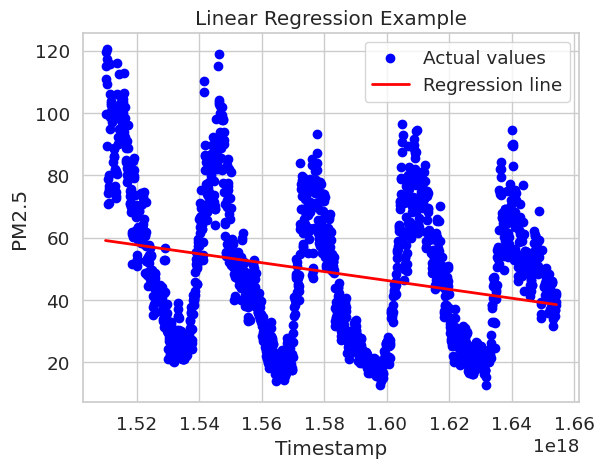

In [113]:
data = pd.read_csv('air-quality-india.csv')
df = pd.DataFrame(data)
df = preProcess(df)
linearReg(df)